In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Function to extract atomic facts from text

In [23]:
def extract_atomic_facts(text):
    """
    Splits the input text into atomic facts by dividing it into sentences.
    Each sentence is treated as an independent atomic fact.
    """
    return [fact.strip() for fact in text.split('.') if fact.strip()]

# Step 2: Function to evaluate atomic facts against a knowledge source

In [24]:
def evaluate_atomic_facts(atomic_facts, knowledge_source):
    """
    Compares atomic facts to a provided knowledge source to determine which are supported.
    - atomic_facts: List of atomic facts extracted from the generated text.
    - knowledge_source: Text representing the knowledge source.
    Returns:
      - factscore: Ratio of supported facts to total facts.
      - supported_facts: List of atomic facts found in the knowledge source.
    """
    knowledge_facts = [fact.strip() for fact in knowledge_source.split('.') if fact.strip()]
    supported_facts = [fact for fact in atomic_facts if fact in knowledge_facts]
    factscore = len(supported_facts) / len(atomic_facts) if atomic_facts else 0
    return factscore, supported_facts

# Step 3: Example input - Generated biography

In [25]:
generated_text = """
Bridget Moynahan is an American actress, model, and producer.
She is best known for her roles in Grey’s Anatomy, I, Robot, and Blue Bloods.
She studied acting at the American Academy of Dramatic Arts.
"""

# Example knowledge source

In [26]:
data_source = """
Bridget Moynahan is an American actress. She is best known for her role in Blue Bloods.
She studied acting at the American Academy of Dramatic Arts.
"""

# Step 5: Extract atomic facts from the generated text
# Each sentence is treated as an atomic fact

In [27]:
atomic_facts = extract_atomic_facts(generated_text)
print("Extracted Atomic Facts:", atomic_facts)

Extracted Atomic Facts: ['Bridget Moynahan is an American actress, model, and producer', 'She is best known for her roles in Grey’s Anatomy, I, Robot, and Blue Bloods', 'She studied acting at the American Academy of Dramatic Arts']


# Step 6: Validate atomic facts against the knowledge source
# Compare the extracted facts to those present in the knowledge source

In [28]:
factscore, validated_facts = evaluate_atomic_facts(atomic_facts, data_source)

# Step 7: Display results using pandas
# Create a DataFrame to tabulate results for clarity

In [29]:
data = {
    "Atomic Fact": atomic_facts,  # List of all extracted atomic facts
    "Validated": [fact in validated_facts for fact in atomic_facts]  # Boolean indicating if fact is validated
}
df = pd.DataFrame(data)
print(df)  # Print the DataFrame for tabular visualization


                                         Atomic Fact  Validated
0  Bridget Moynahan is an American actress, model...      False
1  She is best known for her roles in Grey’s Anat...      False
2  She studied acting at the American Academy of ...       True


# Step 8: Plot results using matplotlib
# Visualize the count of validated vs invalidated facts

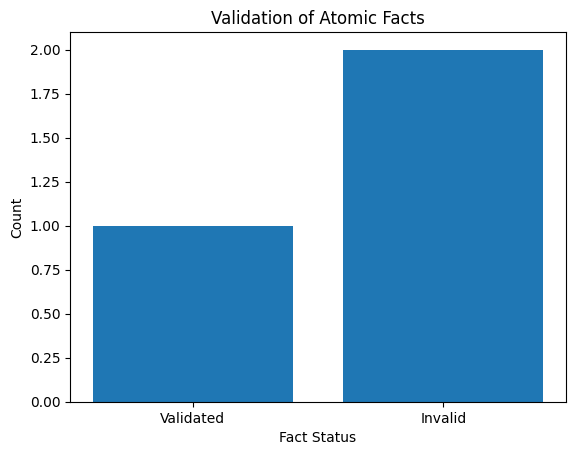

In [30]:
validated_count = sum(data['Validated'])
invalid_count = len(data['Validated']) - validated_count

plt.bar(['Validated', 'Invalid'], [validated_count, invalid_count])  # Create a bar chart
plt.title('Validation of Atomic Facts')  # Set chart title
plt.xlabel('Fact Status')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.show()  # Display the plot

# Step 9: Output the final FACTSCORE
# FACTSCORE represents the ratio of validated facts to total facts

In [31]:
print("\nFACTSCORE:", factscore)
print("Validated Facts:", validated_facts)


FACTSCORE: 0.3333333333333333
Validated Facts: ['She studied acting at the American Academy of Dramatic Arts']
